In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [107]:
# pd.read_html("https://www.sec.gov/Archives/edgar/data/67698/000006769822000008/xslForm13F_X01/CombinedInfoTable_20220630.xml")
df = pd.read_html("./SEC FORM 13-F Information Table.html")[3]
df.columns = df.iloc[2].to_list()
df = df.drop([0,1,2])
df
df.drop(["PRN", "CALL", "DISCRETION", "MANAGER", "SOLE", "SHARED", "NONE"], axis=1)
df["(x$1000)"].astype(float).sum() * 1000

689079000.0

In [108]:
# df = pd.read_csv("https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/100_Portfolios_10x10_Daily_CSV.zip", skiprows=18).iloc[:-1,:]
# cols = df.columns.to_list()
# cols[0] = "Date"
# df.columns = cols
# df["Date"] = pd.to_datetime(df["Date"])
# df.set_index("Date", inplace=True)
# df

In [ ]:
# Before Average Market Cap
# df["Date"].iloc[4000:]
# Average Weighted Value
# df["Date"].iloc[:2310]
# Average Equal weighted Returns
# df["Date"].iloc[1154:]
# pd.to_datetime(df["Date"].iloc[:1154], format="%Y%m")

In [146]:
df = pd.read_csv("https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_5x5_CSV.zip", skiprows=15).iloc[:-1,:]
df = df.iloc[:1154]
cols = df.columns.to_list()
cols[0] = "Date"
df.columns = cols
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m")
df.set_index("Date", inplace=True)
df = df.astype(float)
# df /= 100
df

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,5.8248,-1.7006,0.4875,-1.4580,2.0534,1.2077,2.4192,0.4926,-2.6049,-0.3344,...,1.5893,1.5278,1.2978,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623
1926-08-01,-2.0206,-8.0282,1.3796,1.4606,8.3968,2.3618,-1.1849,4.0084,0.5038,6.1675,...,1.3336,3.8730,2.0021,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576
1926-09-01,-4.8291,-2.6154,-4.3417,-3.2729,0.8649,-2.6540,-1.2618,1.0829,-3.5480,-0.9401,...,1.0923,-0.5250,-1.7636,1.4646,0.8730,-1.2906,3.6538,0.0950,-0.7487,-2.4284
1926-10-01,-9.3729,-3.5519,-3.4948,3.4413,-2.5476,-2.8069,-3.2663,-5.0745,-8.0191,-1.3213,...,-3.3361,-2.6559,-2.1070,-3.1051,-5.3525,-2.7413,-3.0071,-2.2437,-4.6719,-5.8129
1926-11-01,5.5888,4.1877,2.4623,-4.4494,0.5362,3.1033,-2.3690,3.0078,5.1546,2.7292,...,3.4448,2.3887,3.7335,4.9320,1.8213,4.2946,2.5326,1.5204,3.6619,2.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-16.1458,-13.2365,-9.9863,-6.3449,-4.0988,-18.1950,-12.0671,-8.5393,-6.2858,-5.9654,...,-10.7264,-8.0398,-4.8345,-5.6840,-7.0521,-10.8609,-9.2140,-7.1498,-5.5172,-7.4225
2022-05-01,-5.8265,-3.5601,-0.9777,-0.1506,2.9569,-3.2936,-2.8180,2.0090,4.0419,5.7494,...,-2.9505,1.1418,4.0600,0.8937,8.2899,-3.0113,-0.3170,2.8100,6.4726,6.4003
2022-06-01,-6.6490,-4.2722,-4.2452,-6.5665,-9.8769,-2.0535,-6.2438,-6.7874,-6.2183,-12.9730,...,-7.2856,-9.5073,-11.1652,-10.0982,-13.2412,-7.8059,-5.5254,-8.7814,-12.0979,-12.1789


In [147]:
# [V,Lambda]=eig(Sigma)
ff = df.T.to_numpy()
sigma = np.cov(ff)
eig_values, eig_vectors = np.linalg.eig(sigma)
eig_vectors.shape
# sigma.shape

(25, 25)

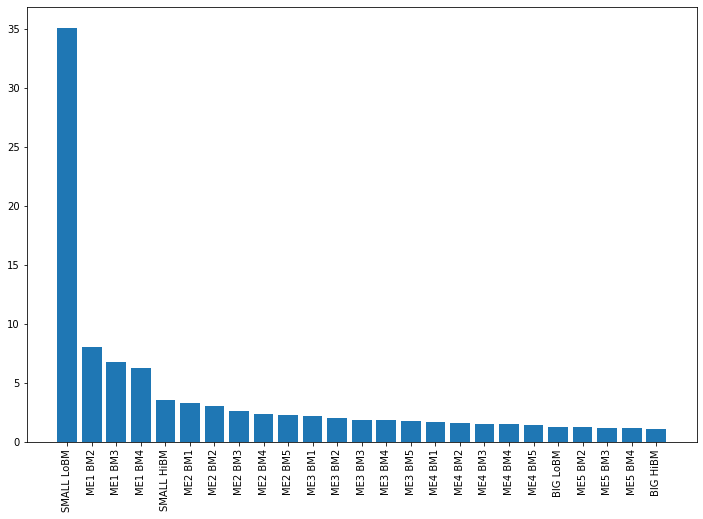

In [151]:
# s = np.diag(eig_values)
s = np.sqrt(eig_values)
s.sort()
s = s[::-1]
plt.figure(figsize=(12, 8))
plt.bar(df.columns.to_list(), s)
plt.xticks(rotation=90)
plt.show()

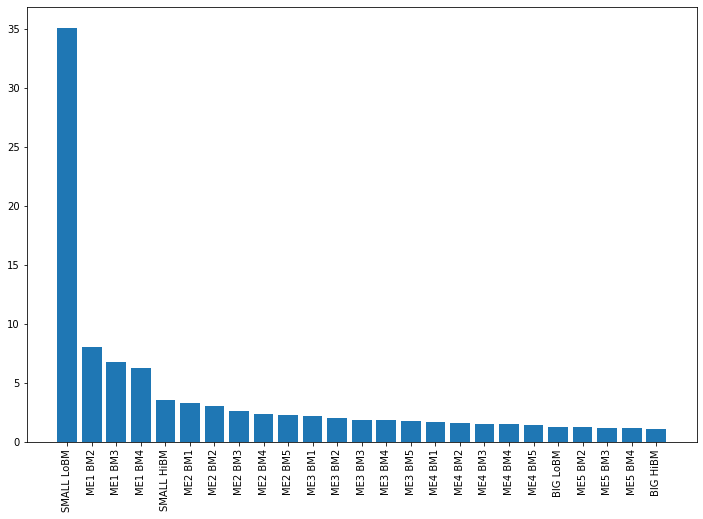

In [171]:
pca = PCA().fit(df)

plt.figure(figsize=(12,8))
plt.bar(df.columns.to_list(), np.sqrt(pca.explained_variance_))
plt.xticks(rotation=90)
plt.show()

In [7]:
df = pd.read_csv("../Data/FRB_H15.csv", skiprows=5)
df.columns = ["Date", "1M", "3M", "6M", "1Y", "2Y", "3Y", "5Y", "7Y", "10Y", "20Y", "30Y"]
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df = df.apply(pd.to_numeric, errors="coerce")
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15865 entries, 1962-01-02 to 2022-10-24
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1M      5311 non-null   float64
 1   3M      10287 non-null  float64
 2   6M      10287 non-null  float64
 3   1Y      15189 non-null  float64
 4   2Y      11597 non-null  float64
 5   3Y      15189 non-null  float64
 6   5Y      15189 non-null  float64
 7   7Y      13319 non-null  float64
 8   10Y     15189 non-null  float64
 9   20Y     13500 non-null  float64
 10  30Y     11419 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [8]:
df.loc["1952":"1994"][["3M", "1Y", "2Y", "3Y", "5Y"]]

,3M,1Y,2Y,3Y,5Y
Date,,,,,
1962-01-02,NaN,3.22,NaN,3.70,3.88
1962-01-03,NaN,3.24,NaN,3.70,3.87
1962-01-04,NaN,3.24,NaN,3.69,3.86
1962-01-05,NaN,3.26,NaN,3.71,3.89
1962-01-08,NaN,3.31,NaN,3.71,3.91
...,...,...,...,...,...
1994-12-26,NaN,NaN,NaN,NaN,NaN
1994-12-27,5.74,7.18,7.67,7.76,7.78
1994-12-28,5.68,7.25,7.71,7.78,7.81


,3M,1Y,2Y,3Y,5Y
PC1,0.437916,0.470879,0.461823,0.446661,0.416792
PC2,-0.724694,-0.234416,0.126107,0.308944,0.555444
PC3,-0.519828,0.597807,0.303905,0.056220,-0.526200
PC4,-0.112367,0.595077,-0.501640,-0.420654,0.452399
PC5,0.014143,0.108775,-0.653311,0.724525,-0.190303


<AxesSubplot:xlabel='Date'>

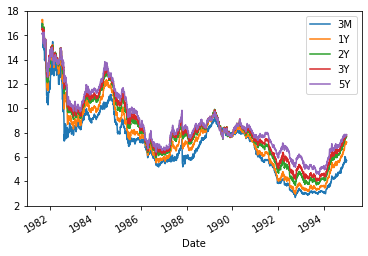

In [13]:
df2 = df.loc["1952":"1994"][["3M", "1Y", "2Y", "3Y", "5Y"]].dropna()
pca = PCA(n_components=5).fit(df2)
# df2 /= 100
display(pd.DataFrame(pca.components_, index=["PC1", "PC2", "PC3", "PC4", "PC5"], columns=df2.columns))
# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# display(pd.DataFrame(loadings.T, index=["PC1", "PC2", "PC3", "PC4", "PC5"], columns=df2.columns))
df2.plot()

In [15]:
df2 = df.loc["1952":"1994"][["3M", "1Y", "2Y", "3Y", "5Y"]].dropna()
pca = PCA(n_components=5).fit(df2)
df2 /= 100
f_load = pd.DataFrame(pca.components_, index=["PC1", "PC2", "PC3", "PC4", "PC5"], columns=df2.columns)
display(f_load)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
display(pd.DataFrame(loadings.T, index=["PC1", "PC2", "PC3", "PC4", "PC5"], columns=df2.columns))
# df2.plot()

,3M,1Y,2Y,3Y,5Y
PC1,0.437916,0.470879,0.461823,0.446661,0.416792
PC2,-0.724694,-0.234416,0.126107,0.308944,0.555444
PC3,-0.519828,0.597807,0.303905,0.056220,-0.526200
PC4,-0.112367,0.595077,-0.501640,-0.420654,0.452399
PC5,0.014143,0.108775,-0.653311,0.724525,-0.190303


,3M,1Y,2Y,3Y,5Y
PC1,2.612302,2.808938,2.754913,2.664471,2.486290
PC2,-0.485182,-0.156941,0.084428,0.206837,0.371869
PC3,-0.109939,0.126431,0.064273,0.011890,-0.111287
PC4,-0.006952,0.036815,-0.031034,-0.026024,0.027988
PC5,0.000500,0.003842,-0.023077,0.025592,-0.006722


<AxesSubplot:>

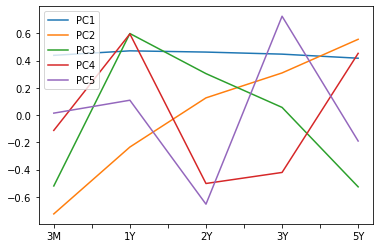

In [16]:
f_load.T.plot()

In [45]:
pca = PCA(n_components=3)
df2pca = pd.DataFrame(pca.fit_transform(df2))
# df2pca.plot()

In [51]:
# pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3"])
display(pd.DataFrame(pca.components_, index=["PC1", "PC2", "PC3"], columns=df2.columns))

,3M,1Y,2Y,3Y,5Y
PC1,0.437916,0.470879,0.461823,0.446661,0.416792
PC2,-0.724694,-0.234416,0.126107,0.308944,0.555444
PC3,-0.519828,0.597807,0.303905,0.056220,-0.526200


In [54]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
pd.DataFrame(loadings.T, index=["PC1", "PC2", "PC3"], columns=df2.columns)

,3M,1Y,2Y,3Y,5Y
PC1,2.612302,2.808938,2.754913,2.664471,2.486290
PC2,-0.485182,-0.156941,0.084428,0.206837,0.371869
PC3,-0.109939,0.126431,0.064273,0.011890,-0.111287
